1.	Perform combined over and undersampling on the diabetes dataset (use SMOTEENN). Explain how combined sampling works

In [256]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.metrics import classification_report, plot_confusion_matrix
import pydotplus


from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
from IPython.display import Image

In [257]:
diabetes_df = pd.read_csv("A:\launch_code_STL\Final_Homework\week-13\diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [258]:
diabetes_df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

We can notice the diabetes data is imbalance, where the majority class belongs to "0" i.e, negative label and the minority class belongs to "1" i.e, positive label

In [259]:
X = diabetes_df.drop('Outcome', axis=1)  #Features
y = diabetes_df['Outcome'].values  #Target

In [260]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size = 0.3, random_state=1, stratify=y)

In [261]:
# Using SMOTE-ENN to balance the data
model = AdaBoostClassifier() # define Model

resample = SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy = 'all'))  #define SMOTEENN

pipeline=Pipeline(steps=[('r', resample), ('m', model)])  ##Define pipeline

#Define evaluation procedure (here we use Repeated Stratified K-Fold CV)
cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Evaluate model
scoring=['accuracy','precision_macro','recall_macro']
scores = cross_validate(pipeline, X, y, scoring=scoring, cv=cv, n_jobs=-1)

# summarize performance
print('Mean Accuracy: %.4f' % np.mean(scores['test_accuracy']))
print('Mean Precision: %.4f' % np.mean(scores['test_precision_macro']))
print('Mean Recall: %.4f' % np.mean(scores['test_recall_macro']))

Mean Accuracy: 0.7335
Mean Precision: 0.7290
Mean Recall: 0.7477


From the above observations we can find  that the recall score is little high when compared to the accuracy and precision score, that means the model performance to correctly predict the minority class label is better if we use SMOTE-ENN to balance the data.

2.	Perform logistic regression with the new data from question 1. 
a.	Comment on the performance of combined sampling vs the other approaches we have used for the diabetes dataset


In [304]:
df = pd.read_csv("A:\launch_code_STL\Final_Homework\week-13\diabetes.csv")
X = df.drop('Outcome', axis=1)
y = df.Outcome
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [316]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression(max_iter=150)

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[168  38]
 [ 36  66]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       206
           1       0.63      0.65      0.64       102

    accuracy                           0.76       308
   macro avg       0.73      0.73      0.73       308
weighted avg       0.76      0.76      0.76       308



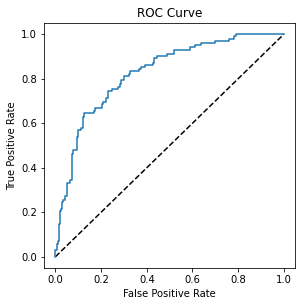

In [317]:
# Create the classifier: logreg
logreg = LogisticRegression(multi_class='ovr', n_jobs=1, solver='liblinear')

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.subplots(figsize=(4.5, 4.5))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

3. Create an ROC Curve for the model https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html and calculate the AUC. 
a. BRIEFLY explain what the ROC Curve shows and what the resulting AUC means. 


AUC: 0.8267656577193985
AUC scores computed using 5-fold cross-validation: [0.7987037  0.80777778 0.81944444 0.86622642 0.85037736]


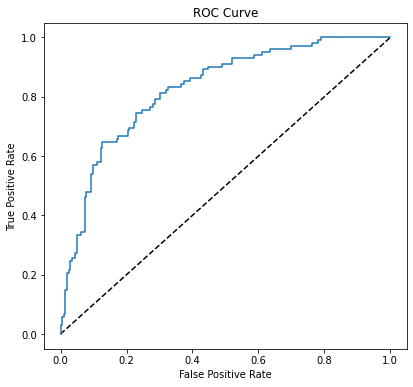

In [318]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
# instantiate the classifier
logreg = LogisticRegression(multi_class='ovr', n_jobs=1, solver='liblinear')

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# fit the model to the train data
logreg.fit(X_train, y_train)

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print(f"AUC: {roc_auc_score(y_test, y_pred_prob)}")

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
print(f"AUC scores computed using 5-fold cross-validation: {cv_auc}")

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.subplots(figsize=(6.5, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

4.What is outlier detection? Why is it useful? What methods can you use for outlier detection?

5.Perform a linear SVM to predict credit approval (last column) using this dataset: https://archive.ics.uci.edu/ml/datasets/Statlog+%28Australian+Credit+Approval%29 . Make sure you look at the accompanying document that describes the data in the dat file. You will need to either convert this data to another file type or import the dat file to python. You can use this code, but otherwise you follow standard practices we have already used many times:

from sklearn.svm import SVC

classifier = SVC(kernel='linear')

a. How did the SVM model perform?

In [319]:
# import the .dat file into python
import numpy as np
from io import StringIO

data = np.genfromtxt(r'C:\Users\rsagu\Downloads\australian.dat',
                     names='A1, A2, A3, A4, A5, A6, A7, A8, A9, A10, A11, A12, A13, A14, A15',
                     dtype=None,
                     delimiter=' ')
print(data)

[(1, 22.08, 11.46 , 2,  4, 4,  1.585, 0, 0,  0, 1, 2,  100,   1213, 0)
 (0, 22.67,  7.   , 2,  8, 4,  0.165, 0, 0,  0, 0, 2,  160,      1, 0)
 (0, 29.58,  1.75 , 1,  4, 4,  1.25 , 0, 0,  0, 1, 2,  280,      1, 0)
 (0, 21.67, 11.5  , 1,  5, 3,  0.   , 1, 1, 11, 1, 2,    0,      1, 1)
 (1, 20.17,  8.17 , 2,  6, 4,  1.96 , 1, 1, 14, 0, 2,   60,    159, 1)
 (0, 15.83,  0.585, 2,  8, 8,  1.5  , 1, 1,  2, 0, 2,  100,      1, 1)
 (1, 17.42,  6.5  , 2,  3, 4,  0.125, 0, 0,  0, 0, 2,   60,    101, 0)
 (0, 58.67,  4.46 , 2, 11, 8,  3.04 , 1, 1,  6, 0, 2,   43,    561, 1)
 (1, 27.83,  1.   , 1,  2, 8,  3.   , 0, 0,  0, 0, 2,  176,    538, 0)
 (0, 55.75,  7.08 , 2,  4, 8,  6.75 , 1, 1,  3, 1, 2,  100,     51, 0)
 (1, 33.5 ,  1.75 , 2, 14, 8,  4.5  , 1, 1,  4, 1, 2,  253,    858, 1)
 (1, 41.42,  5.   , 2, 11, 8,  5.   , 1, 1,  6, 1, 2,  470,      1, 1)
 (1, 20.67,  1.25 , 1,  8, 8,  1.375, 1, 1,  3, 1, 2,  140,    211, 0)
 (1, 34.92,  5.   , 2, 14, 8,  7.5  , 1, 1,  6, 1, 2,    0,   1001, 1)
 (1, 5

In [320]:
dat_df = pd.DataFrame(data) 
dat_df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
0,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [321]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sb

In [322]:
X = dat_df.iloc[:, :-1].values
y = dat_df.iloc[:, -1].values

In [323]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(
        transformers = [('one_hot_encoder', OneHotEncoder(categories = 'auto'),[3, 4, 5, 11])],
        remainder = 'passthrough')

X = ct.fit_transform(X)

# Scaling - Standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [324]:
# Splitting dataset into train & test subsets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 0)

In [337]:
from sklearn.svm import LinearSVC

svm = LinearSVC(max_iter=10000)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

In [338]:
from sklearn import metrics

print("Accuracy Score =", format(metrics.accuracy_score(y_test, svm_pred)))

Accuracy Score = 0.8768115942028986


In [339]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, svm_pred))
print(classification_report(y_test,svm_pred))

[[66  7]
 [10 55]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.89        73
           1       0.89      0.85      0.87        65

    accuracy                           0.88       138
   macro avg       0.88      0.88      0.88       138
weighted avg       0.88      0.88      0.88       138



In [299]:
#Building the model using Support Vector Machine (SVM)

from sklearn.svm import SVC

svc_model = SVC(kernel='linear')
svc_model.fit(X_train, y_train)

svc_pred = svc_model.predict(X_test)

In [300]:
from sklearn import metrics

print("Accuracy Score =", format(metrics.accuracy_score(y_test, svc_pred)))

Accuracy Score = 0.855072463768116


In [301]:
from sklearn.metrics import recall_score
recall_score(y_test, svc_pred)

0.8307692307692308

In [302]:
from sklearn.metrics import precision_score
precision_score(y_test, svc_pred)

0.8571428571428571

In [303]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test,svc_pred))

[[64  9]
 [11 54]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.86        73
           1       0.86      0.83      0.84        65

    accuracy                           0.86       138
   macro avg       0.86      0.85      0.85       138
weighted avg       0.86      0.86      0.85       138



6.	What kinds of jobs in data are you most interested in? Do some research on what is out there. Write about your thoughts in under 400 words. 